## Import Libraries

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()     #Use seaborn style on matplotlib plots
import scipy as sp     #Useful for different stats functions
import statsmodels.api as sm     #Useful stats functions
from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#from sklearn.linear_model import LinearRegression

## Import Dataset

In [3]:
df_train = pd.read_csv(r'C:\Users\sriha\OneDrive\Desktop\DS\My work\Titanic\train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#import os
#cwd = os.getcwd()
#print(cwd)

## Exploratory Data Analysis

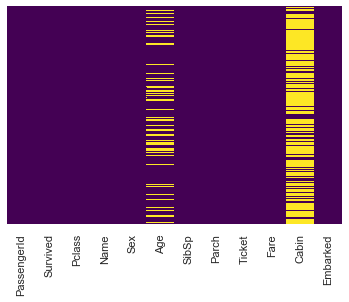

In [5]:
# Check for null values

sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

The age column has several missing values, but this can be filled in based on the other entries. The cabin column however, is mostly empty. This column may need to be dropped.

In [6]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

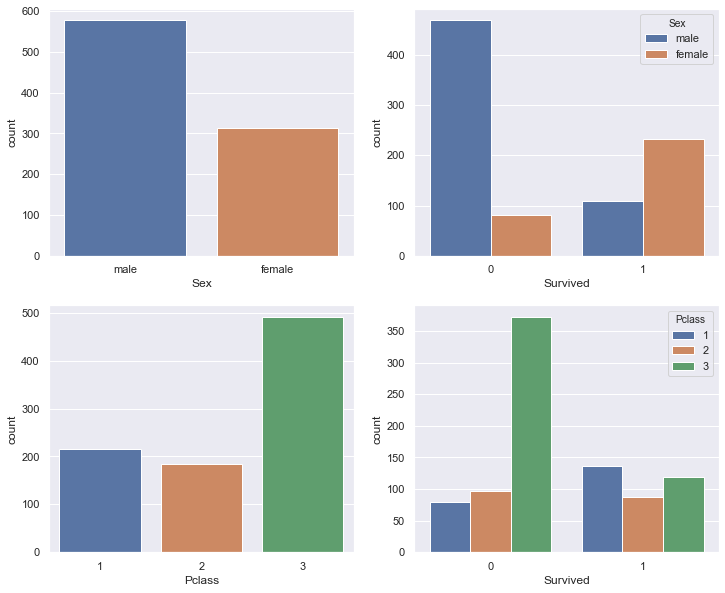

In [7]:
# Explore the different columns

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(x='Sex', data=df_train)
plt.subplot(2,2,2)
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.subplot(2,2,3)
sns.countplot(x='Pclass', data=df_train)
plt.subplot(2,2,4)
sns.countplot(x='Survived', hue='Pclass', data=df_train)

- There were more men present on the ship, but proportionally, more women survived.
- Most of the passengers purchased 3rd class tickets, and the majority of patients who did *not* survive had 3rd class tickets.
    - Majority of passengers with 1st class tickets survived.
    - About the same number of passengers with 2nd class tickets survived as those who did not.
    - Most passengers with 3rd class tickets did not survive.

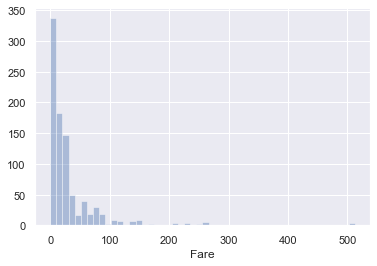

In [8]:
# More data exploration. Look at ticket price distribution
sns.distplot(df_train['Fare'], kde=False)

As noted above, the majority of passengers bought 3rd class tickets, which is confirmed here by the majority of passengers having paid lower fares. 

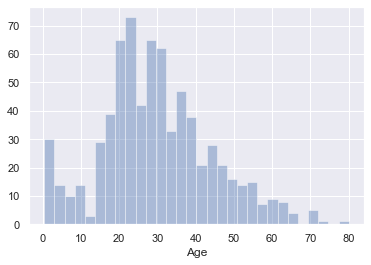

In [9]:
# Look at age distribution
sns.distplot(df_train['Age'].dropna(), bins=30, kde=False)

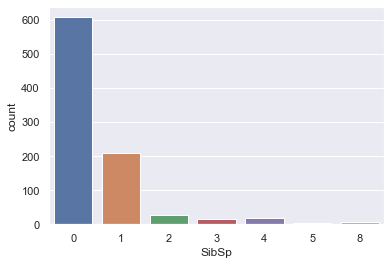

In [10]:
sns.countplot(x='SibSp', data=df_train)

This column shows how many passengers travelled with a sibling or spouse. Looks like the majority of passengers were on the titanic by themselves. About a third as many passengers travelled with one other, possibly a spouse. Only a small minority travelled with more than one person (i.e. spouse and 1+ children).

## Data Cleaning

It makes sense to fill the missing values in the Age column. We could fill these columnsbased on the average age of another category, such as Pclass or Sex. Using PClass here, since it seems to have a stronger impact on whether on not a passenger survived. 

In [13]:
# Figure out the mean age for each class
mean_age = round(df_train.groupby('Pclass').mean()['Age'])

# Define a function to fill in null values
#df_train.groupby('Pclass')['Age'].apply(lambda x: x.fillna(round(x.mean())))

In [12]:
df_train['Age'].isnull().sum()

177